<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/mnist3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### تعریف توابع مورد نیاز

# تعریف تابع پلات

In [119]:
def plot_history(net_history):
  history=net_history.history

  losses=history['loss']
  val_losses=history['val_loss']

  accuracy=history['accuracy']
  val_accuracy=history['val_accuracy']
  
  plt.xlabel('epoches')
  plt.ylabel('losses')
  plt.plot(losses)
  plt.plot(val_losses)
  plt.legend(['loss','val_loss'])

  plt.figure()
  plt.xlabel('epoches')
  plt.ylabel('accuracy')
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.legend(['accuracy','val_accuracy'])


## mnist کار کردن با دیتا بیس 

In [40]:
import keras
import tensorflow
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [51]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()


## شناخت داده لود شده

In [37]:
train_images.shape
train_images.ndim
train_images.dtype
print('train_image shape is: ' ,train_images.shape)
print('train_image dtype is: ' ,train_images.dtype)
print('train_images ndim is: ' ,train_images.ndim)

train_image shape is:  (60000, 28, 28)
train_image dtype is:  uint8
train_images ndim is:  3


## پیش پردازش داده

In [55]:
from keras.utils import np_utils


In [78]:
#داده دیگر تصویر نیست پس به آن ایمیج نمیگوییم
X_train=train_images.reshape(60000,784)
X_test=test_images.reshape(10000,784)
#چون میخواهیم داده ها را نرمال کنیم آنها را اعشاری میکنیم
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255
#حال باید لیبل ها رو برای لایه سافت مکس آماده کنیم
Y_train=np_utils.to_categorical(train_labels)
Y_test=np_utils.to_categorical(test_labels)

# شبکه عصبی فولی کانکتد

## ساختن شبکه عصبی

In [66]:
from keras.models import Sequential
myModel=Sequential()
from keras.layers import Dense
myModel.add(Dense(500,activation='relu',input_shape=(784,)))
myModel.add(Dense(100,activation='relu'))
myModel.add(Dense(10,activation='softmax'))

In [67]:
myModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               392500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


## کامپایل کردن وآموزش شبکه عصبی

In [114]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
myModel.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

network_history=myModel.fit(X_train,Y_train,batch_size=128,epochs=20,validation_split=0.2)



Epoch 1/20
375/375 [==============================] - 9s 23ms/step - loss: 0.3601 - accuracy: 0.9015 - val_loss: 0.3295 - val_accuracy: 0.9109
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.3555 - accuracy: 0.9026 - val_loss: 0.3257 - val_accuracy: 0.9111
Epoch 3/20
375/375 [==============================] - 5s 12ms/step - loss: 0.3512 - accuracy: 0.9034 - val_loss: 0.3224 - val_accuracy: 0.9117
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.3471 - accuracy: 0.9047 - val_loss: 0.3190 - val_accuracy: 0.9126
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3432 - accuracy: 0.9055 - val_loss: 0.3158 - val_accuracy: 0.9131
Epoch 6/20
375/375 [==============================] - 4s 12ms/step - loss: 0.3395 - accuracy: 0.9065 - val_loss: 0.3129 - val_accuracy: 0.9137
Epoch 7/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3359 - accuracy: 0.9074 - val_loss: 0.3099 - val_accuracy: 0.9153

In [116]:
history=network_history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

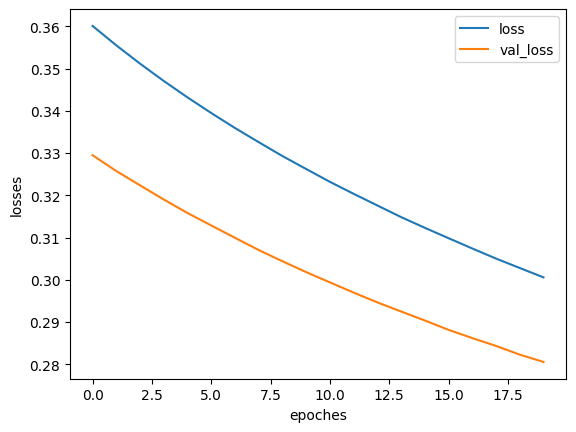

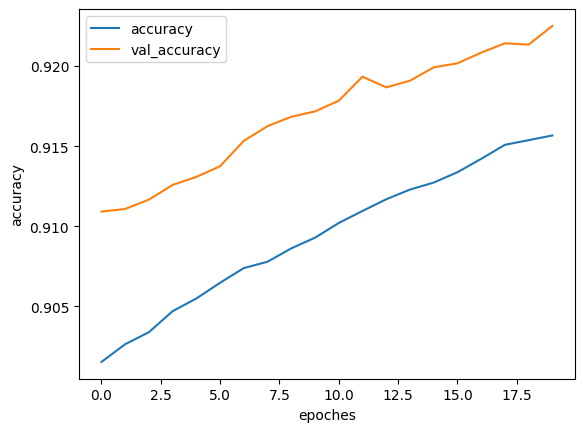

In [120]:
plot_history(network_history)